Library

In [3]:
import numpy as np
import pandas as pd

Create dataset for Bernoulli Distribution

In [4]:
np.random.seed(1)
x1 = np.random.choice([1,0] , size=10)
x2 = np.random.choice([1,0] , size=10)
y = np.random.choice([1,0] , size=10)
df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})
df

,x1,x2,y
0,0,1,1
1,0,0,0
2,1,1,1
3,1,0,1
4,0,0,0
5,0,1,1
6,0,1,1
7,0,0,1
8,0,1,0
9,1,1,1


formula Naive Bayes

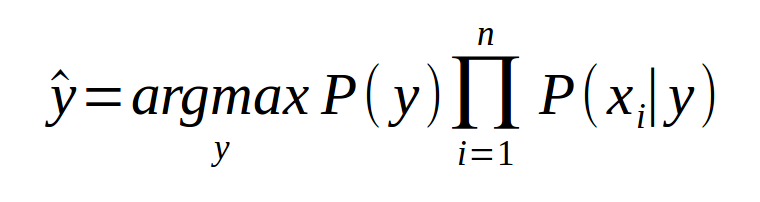

Likelihood

$
P(x_i | y) = \frac{P(x_i,y)}{P(y)}
$

data frequency $P(x_i,y)$

In [5]:
n_parameters = 1
n_tables = 0
y_unique = df['y'].nunique()
List_frequncy = []
for col in df.columns:
    unique_vals = df[col].nunique()
    if col != 'y':
        n_tables += 1
        print(f'Number of tables: {n_tables}, It has {unique_vals * y_unique} parameters')
        # crosstab
        freq = pd.crosstab(df[col], df['y'])
        print(f"Frequency Table for {col} and y:")
        display(freq)
        List_frequncy.append(freq)
        # corsstab
    n_parameters *= unique_vals

print('Likelihood Parameters:', n_parameters)



Number of tables: 1, It has 4 parameters
Frequency Table for x1 and y:


y,0,1
x1,,
0,3,4
1,0,3


Number of tables: 2, It has 4 parameters
Frequency Table for x2 and y:


y,0,1
x2,,
0,2,2
1,1,5


Likelihood Parameters: 8


$P(y)$

Prior tables

In [10]:
display(df['y'].value_counts())

y
1    7
0    3
Name: count, dtype: int64

Likelihood and Prior tables (frequncy)

In [8]:
combined_freq = pd.concat(List_frequncy, keys=['x1', 'x2'], axis=1)
combined_freq.columns = pd.MultiIndex.from_product([['x1', 'x2'], [0, 1]], names=['Variable', 'y'])
combined_freq['y'] = df['y'].value_counts().reindex([0, 1], fill_value=0).values

print("\nCombined Frequency Table:")
display(combined_freq)


Combined Frequency Table:


Variable x1    x2     y
y         0  1  0  1   
0         3  4  2  2  3
1         0  3  1  5  7

Likelihood and Prior tables (probability)
model Naive Bayes

In [14]:
prob_x1_given_y = combined_freq['x1'].div(combined_freq['y'], axis=0)
prob_x2_given_y = combined_freq['x2'].div(combined_freq['y'], axis=0)
prob_y = combined_freq['y'].div(combined_freq['y'].sum(), axis=0)

print("\nP(x1 | y):")
display(prob_x1_given_y)

print("\nP(x2 | y):")
display(prob_x2_given_y)

print("\nP(y):")
display(prob_y)


P(x1 | y):


y,0,1
0,1.0,1.333333
1,0.0,0.428571



P(x2 | y):


y,0,1
0,0.666667,0.666667
1,0.142857,0.714286



P(y):


0    0.3
1    0.7
Name: y, dtype: float64

Prediction

In [47]:
new_data = [1,0] # predict y [0,1]

likelihood = prob_x1_given_y[1]
print('likelihood :')
display(likelihood)
print(' ')

prior = prob_y
print('prior :')
display(prior)
print(' ')

postrior = prob_x1_given_y[1] * prob_y
print('postrior :')
display(postrior)
print(' ')

argmax_postrior = np.argmax(postrior)
print('argmax_postrior :')
display(argmax_postrior)

likelihood :


0    1.333333
1    0.428571
Name: 1, dtype: float64

 
prior :


0    0.3
1    0.7
Name: y, dtype: float64

 
postrior :


0    0.4
1    0.3
dtype: float64

 
argmax_postrior :


0

In [46]:
#summary
#new data [0 , 1 ]
print(f'x1 = {new_data[0]}')
print(f'x2 = {new_data[1]}')
print(f'y_predict = {argmax_postrior}')

x1 = 1
x2 = 0
y_predict = 0


In [ ]:
new_data = [1,0]